In [7]:
#pip install ucimlrepo
!pip install ucimlrepo
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load the dataset
data_url = 'https://archive.ics.uci.edu/static/public/15/data.csv'
columns = ['Sample_code_number', 'Clump_thickness', 'Uniformity_of_cell_size', 'Uniformity_of_cell_shape',
           'Marginal_adhesion', 'Single_epithelial_cell_size', 'Bare_nuclei', 'Bland_chromatin',
           'Normal_nucleoli', 'Mitoses', 'Class']
data = pd.read_csv(data_url, names=columns, header=None)

# Drop the first row (duplicate header)
data = data.drop(0)

# Data Exploration
print(data.head())

  Sample_code_number Clump_thickness Uniformity_of_cell_size  \
1            1000025               5                       1   
2            1002945               5                       4   
3            1015425               3                       1   
4            1016277               6                       8   
5            1017023               4                       1   

  Uniformity_of_cell_shape Marginal_adhesion Single_epithelial_cell_size  \
1                        1                 1                           2   
2                        4                 5                           7   
3                        1                 1                           2   
4                        8                 1                           3   
5                        1                 3                           2   

  Bare_nuclei Bland_chromatin Normal_nucleoli Mitoses Class  
1           1               3               1       1     2  
2          10               3     

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 1 to 699
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample_code_number           699 non-null    object
 1   Clump_thickness              699 non-null    object
 2   Uniformity_of_cell_size      699 non-null    object
 3   Uniformity_of_cell_shape     699 non-null    object
 4   Marginal_adhesion            699 non-null    object
 5   Single_epithelial_cell_size  699 non-null    object
 6   Bare_nuclei                  683 non-null    object
 7   Bland_chromatin              699 non-null    object
 8   Normal_nucleoli              699 non-null    object
 9   Mitoses                      699 non-null    object
 10  Class                        699 non-null    object
dtypes: object(11)
memory usage: 60.2+ KB
None


In [5]:
print(data.describe())


       Sample_code_number Clump_thickness Uniformity_of_cell_size  \
count                 699             699                     699   
unique                645              10                      10   
top               1182404               1                       1   
freq                    6             145                     384   

       Uniformity_of_cell_shape Marginal_adhesion Single_epithelial_cell_size  \
count                       699               699                         699   
unique                       10                10                          10   
top                           1                 1                           2   
freq                        353               407                         386   

       Bare_nuclei Bland_chromatin Normal_nucleoli Mitoses Class  
count          683             699             699     699   699  
unique          10              10              10       9     2  
top              1               2             

<Figure size 1200x1000 with 0 Axes>

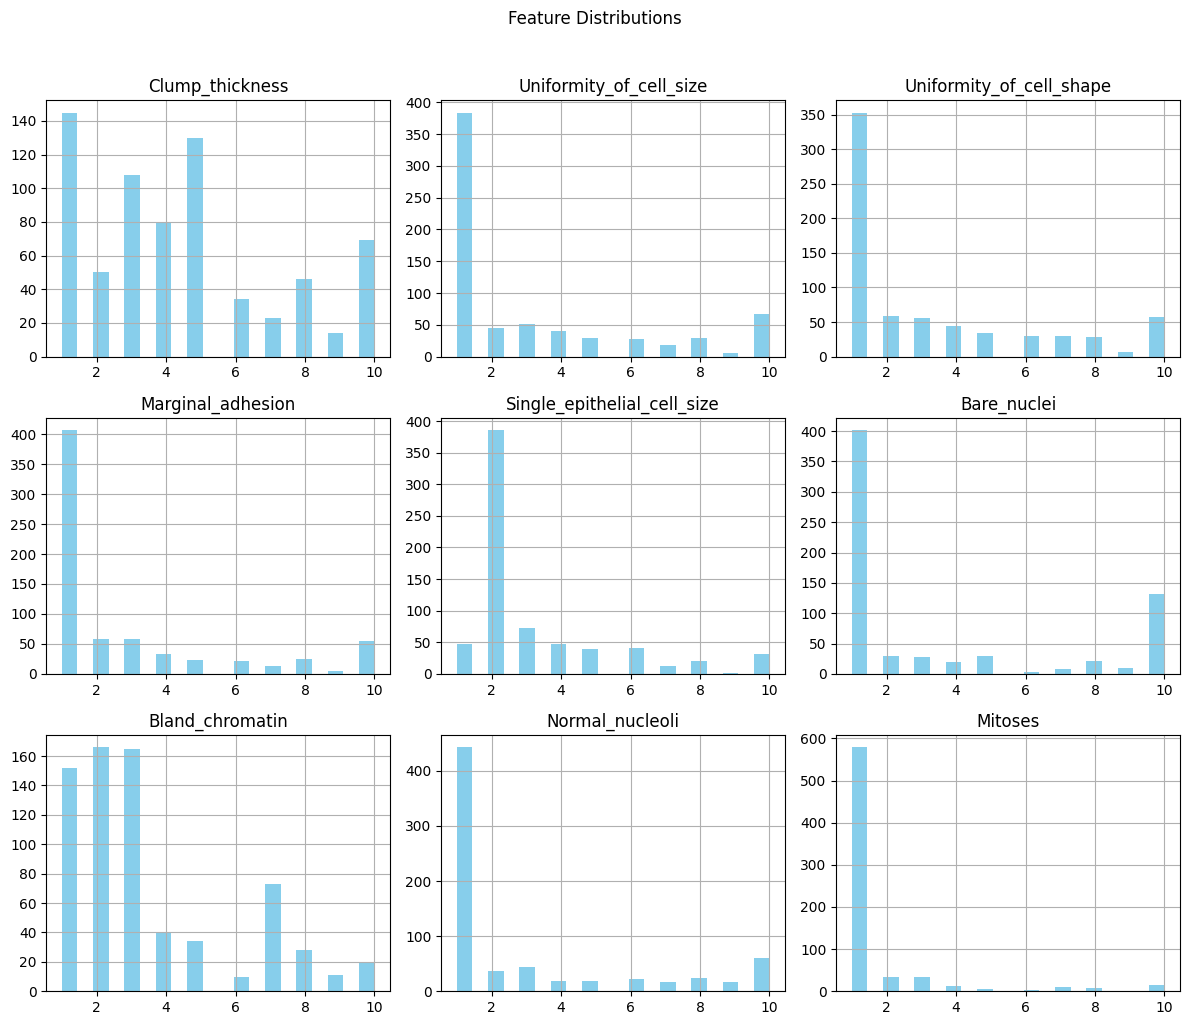

In [8]:
# Visualize distribution of each feature
plt.figure(figsize=(12, 10))
data.drop(['Sample_code_number', 'Class'], axis=1).astype(float).hist(bins=20, figsize=(12, 10), color='skyblue')
plt.suptitle('Feature Distributions', y=1.02)
plt.tight_layout()
plt.show()

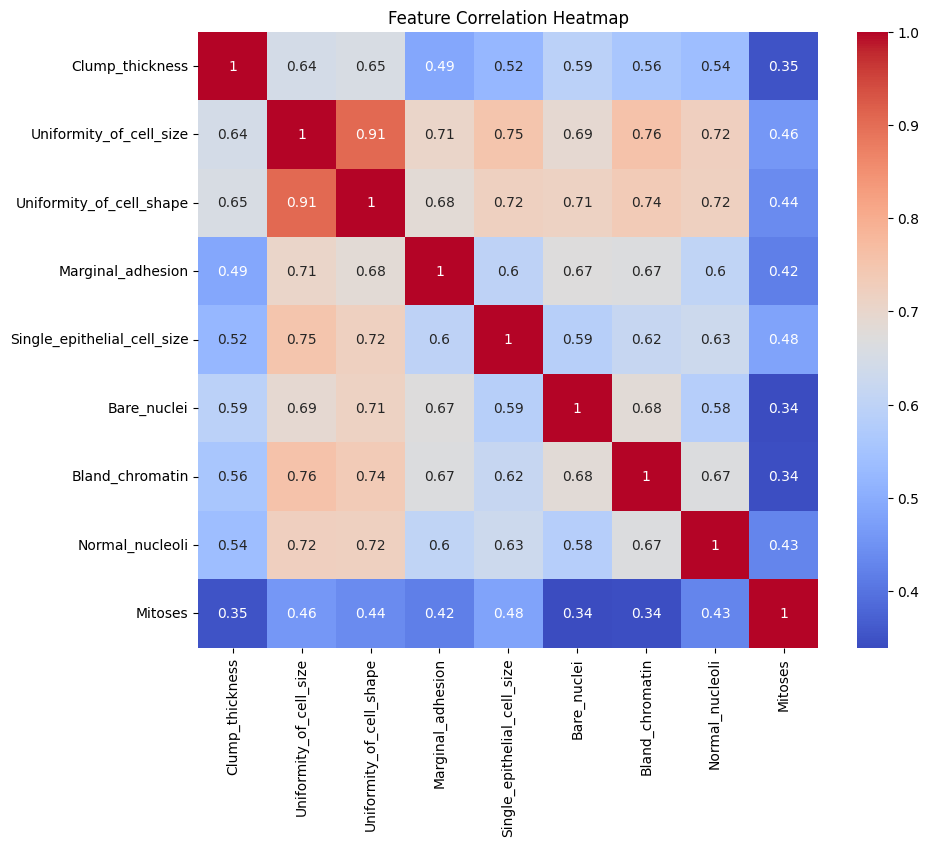

In [9]:

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.drop(['Sample_code_number', 'Class'], axis=1).astype(float).corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

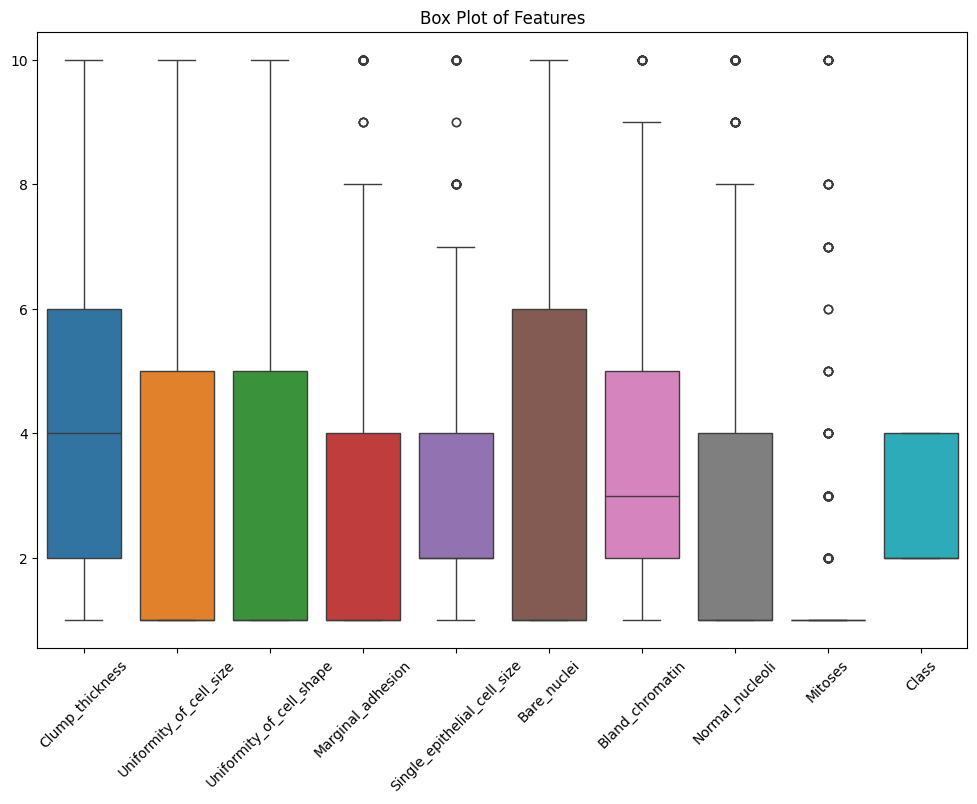

In [10]:

# Box plot to detect outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=data.drop(['Sample_code_number'], axis=1).astype(float))
plt.xticks(rotation=45)
plt.title('Box Plot of Features')
plt.show()


In [11]:
# Data preprocessing
data.replace('?', np.nan, inplace=True)
data['Bare_nuclei'] = pd.to_numeric(data['Bare_nuclei'], errors='coerce')

# Ensure all columns are numeric
numeric_cols = data.drop(['Sample_code_number', 'Class'], axis=1).columns

# Convert all columns in numeric_cols to numeric (force coercion)
data[numeric_cols] = data[numeric_cols].apply(pd.to_numeric, errors='coerce')

imputer = SimpleImputer(strategy='mean')
data[numeric_cols] = imputer.fit_transform(data[numeric_cols])


In [12]:
# Encode target variable
label_encoder = LabelEncoder()
data['Class'] = label_encoder.fit_transform(data['Class'])

# Split dataset
X = data.drop(['Sample_code_number', 'Class'], axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Ensure only numeric values are passed to the scaler
X_train = X_train.astype(float)
X_test = X_test.astype(float)


In [13]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
# Initialize models
log_reg = LogisticRegression(max_iter=5000)
lin_reg = LinearRegression()

# Train models
log_reg.fit(X_train_scaled, y_train)
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [15]:
# Predict and evaluate - Logistic Regression
y_pred_log = log_reg.predict(X_test_scaled)
accuracy_log = accuracy_score(y_test, y_pred_log)
print("Logistic Regression Accuracy:", accuracy_log)

# Predict and evaluate - Linear Regression
y_pred_lin = lin_reg.predict(X_test_scaled)
y_pred_lin_class = np.where(y_pred_lin > 0.5, 1, 0)
accuracy_lin = accuracy_score(y_test, y_pred_lin_class)
mse_lin = mean_squared_error(y_test, y_pred_lin)
print("Linear Regression Accuracy (as classifier):", accuracy_lin)
print("Linear Regression MSE:", mse_lin)

Logistic Regression Accuracy: 0.9619047619047619
Linear Regression Accuracy (as classifier): 0.9619047619047619
Linear Regression MSE: 0.038180005151454345


In [16]:
# Confusion Matrix and Report
conf_matrix_lin = confusion_matrix(y_test, y_pred_lin_class)
conf_matrix_log = confusion_matrix(y_test, y_pred_log)

print("Classification Report - Logistic Regression:\n", classification_report(y_test, y_pred_log))
print("Classification Report - Linear Regression (as classifier):\n", classification_report(y_test, y_pred_lin_class))

Classification Report - Logistic Regression:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       143
           1       0.97      0.91      0.94        67

    accuracy                           0.96       210
   macro avg       0.96      0.95      0.96       210
weighted avg       0.96      0.96      0.96       210

Classification Report - Linear Regression (as classifier):
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       143
           1       0.97      0.91      0.94        67

    accuracy                           0.96       210
   macro avg       0.96      0.95      0.96       210
weighted avg       0.96      0.96      0.96       210



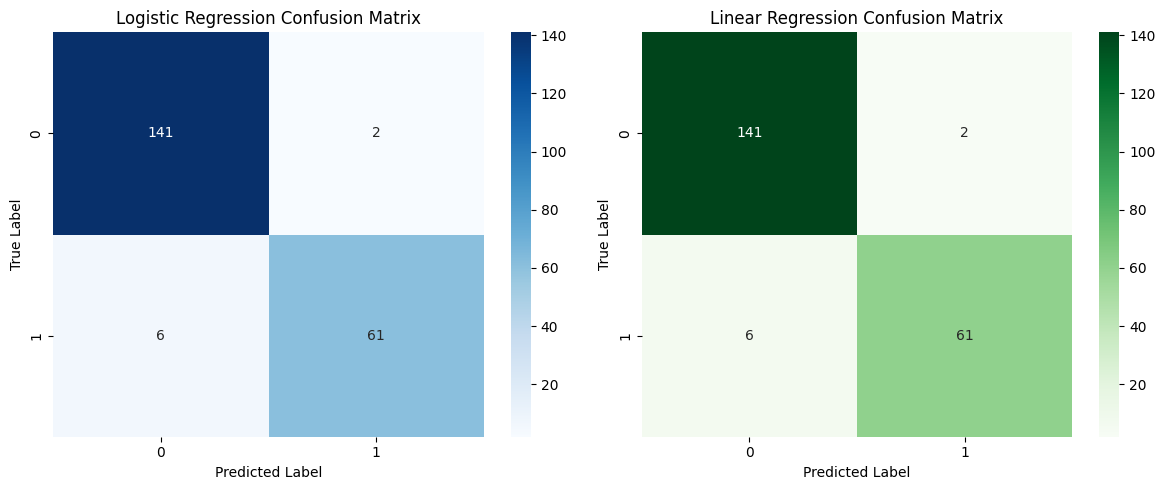

In [17]:
# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(conf_matrix_log, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Logistic Regression Confusion Matrix')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

sns.heatmap(conf_matrix_lin, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Linear Regression Confusion Matrix')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()

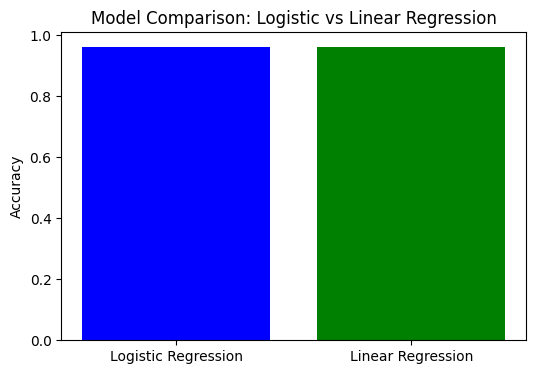

In [18]:
# Comparison of Accuracy
plt.figure(figsize=(6, 4))
plt.bar(['Logistic Regression', 'Linear Regression'], [accuracy_log, accuracy_lin], color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Model Comparison: Logistic vs Linear Regression')
plt.show()
